In [9]:
import pandas as pd
import seaborn as sns

In [10]:
rename_columns = {
    "porto_alegre": "Porto Alegre", 
    "brasilia": "Brasília", 
    "maraba": "Marabá", 
    "juazeiro_do_norte": "Juazeiro do Norte",
    "recife": "Recife", 
    "belo_horizonte": "Belo Horizonte"
}

df = pd.read_csv("results.csv").rename(columns=rename_columns)

In [11]:
test_columns = ["Porto Alegre", "Brasília", "Marabá", "Juazeiro do Norte", "Recife", "Belo Horizonte"]

# Function to get the name of the column with "Teste" for each row
def get_test_column(row):
    for col in test_columns:
        if row[col] == 'Teste':
            return col
    return None  # If no column has "Teste" in the row

def get_new_type(row):
    if row["type"] == "xgb_split3_2":
        return "Split 3/2"
    elif row["type"] == "xgb_split4_1":
        return "Split 4/1"
    else:
        return "Ensemble"

# Create a new column with the name of the column containing "Teste"
df["Hub"] = df.apply(get_test_column, axis=1)
df["Type"] = df.apply(get_new_type, axis=1)

In [12]:
df = df.drop(columns=["Unnamed: 0", "type", "acc", "recall", "precision"])

In [13]:
df = df.drop(columns=test_columns)

In [14]:
df = df.rename(columns={"auc_score": "ROC AUC Score", "f1_score": "F1 Score"})

In [15]:
df

,ROC AUC Score,F1 Score,Hub,Type
0,0.817342,0.342832,Porto Alegre,Split 3/2
1,0.795590,0.306281,Porto Alegre,Split 3/2
2,0.821250,0.289897,Porto Alegre,Split 3/2
3,0.788255,0.317912,Porto Alegre,Split 3/2
4,0.835430,0.345511,Porto Alegre,Split 3/2
...,...,...,...,...
91,0.599624,0.436946,Marabá,Ensemble
92,0.766492,0.299403,Brasília,Ensemble
93,0.546829,0.346650,Juazeiro do Norte,Ensemble
94,0.785826,0.426209,Recife,Ensemble


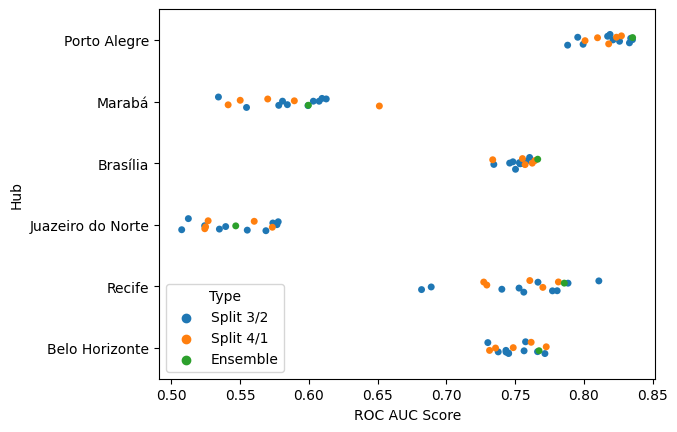

In [17]:
ax = sns.stripplot(x="ROC AUC Score", y="Hub", hue="Type", data=df)